In [33]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score , classification_report, mean_squared_error, r2_score

In [34]:
data = pd.read_csv('final-data.csv')
data.head()

,Domain,Area,Element,Year,Temperatures,DewPoints,Humidity,WindSpeeds,Pressures,Percipitations,Date,TypesOfCrops,Unit,Value,Nutrients,Soil
0,Crops,"Sulib Pangil, Laguna",Yield,2010,24,21,86,15,29.91,0.8,1/1/2010,Yellow Corns,metric ton,"2,708.00","Calcium (Ca), magnesium (Mg), and sulfur (S). ...","pH of 6.0-6.8. light soil (sand or loam), heav..."
1,Crops,"Sulib Pangil, Laguna",Yield,2010,24,21,86,14,29.88,0.7,1/2/2010,Yellow Corns,metric ton,"2,622.00","Calcium (Ca), magnesium (Mg), and sulfur (S). ...","pH of 6.0-6.8. light soil (sand or loam), heav..."
2,Crops,"Sulib Pangil, Laguna",Yield,2010,24,21,83,14,29.88,0.4,1/3/2010,Yellow Corns,metric ton,"2,864.00","Calcium (Ca), magnesium (Mg), and sulfur (S). ...","pH of 6.0-6.8. light soil (sand or loam), heav..."
3,Crops,"Sulib Pangil, Laguna",Yield,2010,24,22,88,15,29.85,0.8,1/4/2010,Yellow Corns,metric ton,"2,804.00","Calcium (Ca), magnesium (Mg), and sulfur (S). ...","pH of 6.0-6.8. light soil (sand or loam), heav..."
4,Crops,"Sulib Pangil, Laguna",Yield,2010,24,21,86,13,29.85,0.6,1/5/2010,Yellow Corns,metric ton,"2,249.00","Calcium (Ca), magnesium (Mg), and sulfur (S). ...","pH of 6.0-6.8. light soil (sand or loam), heav..."


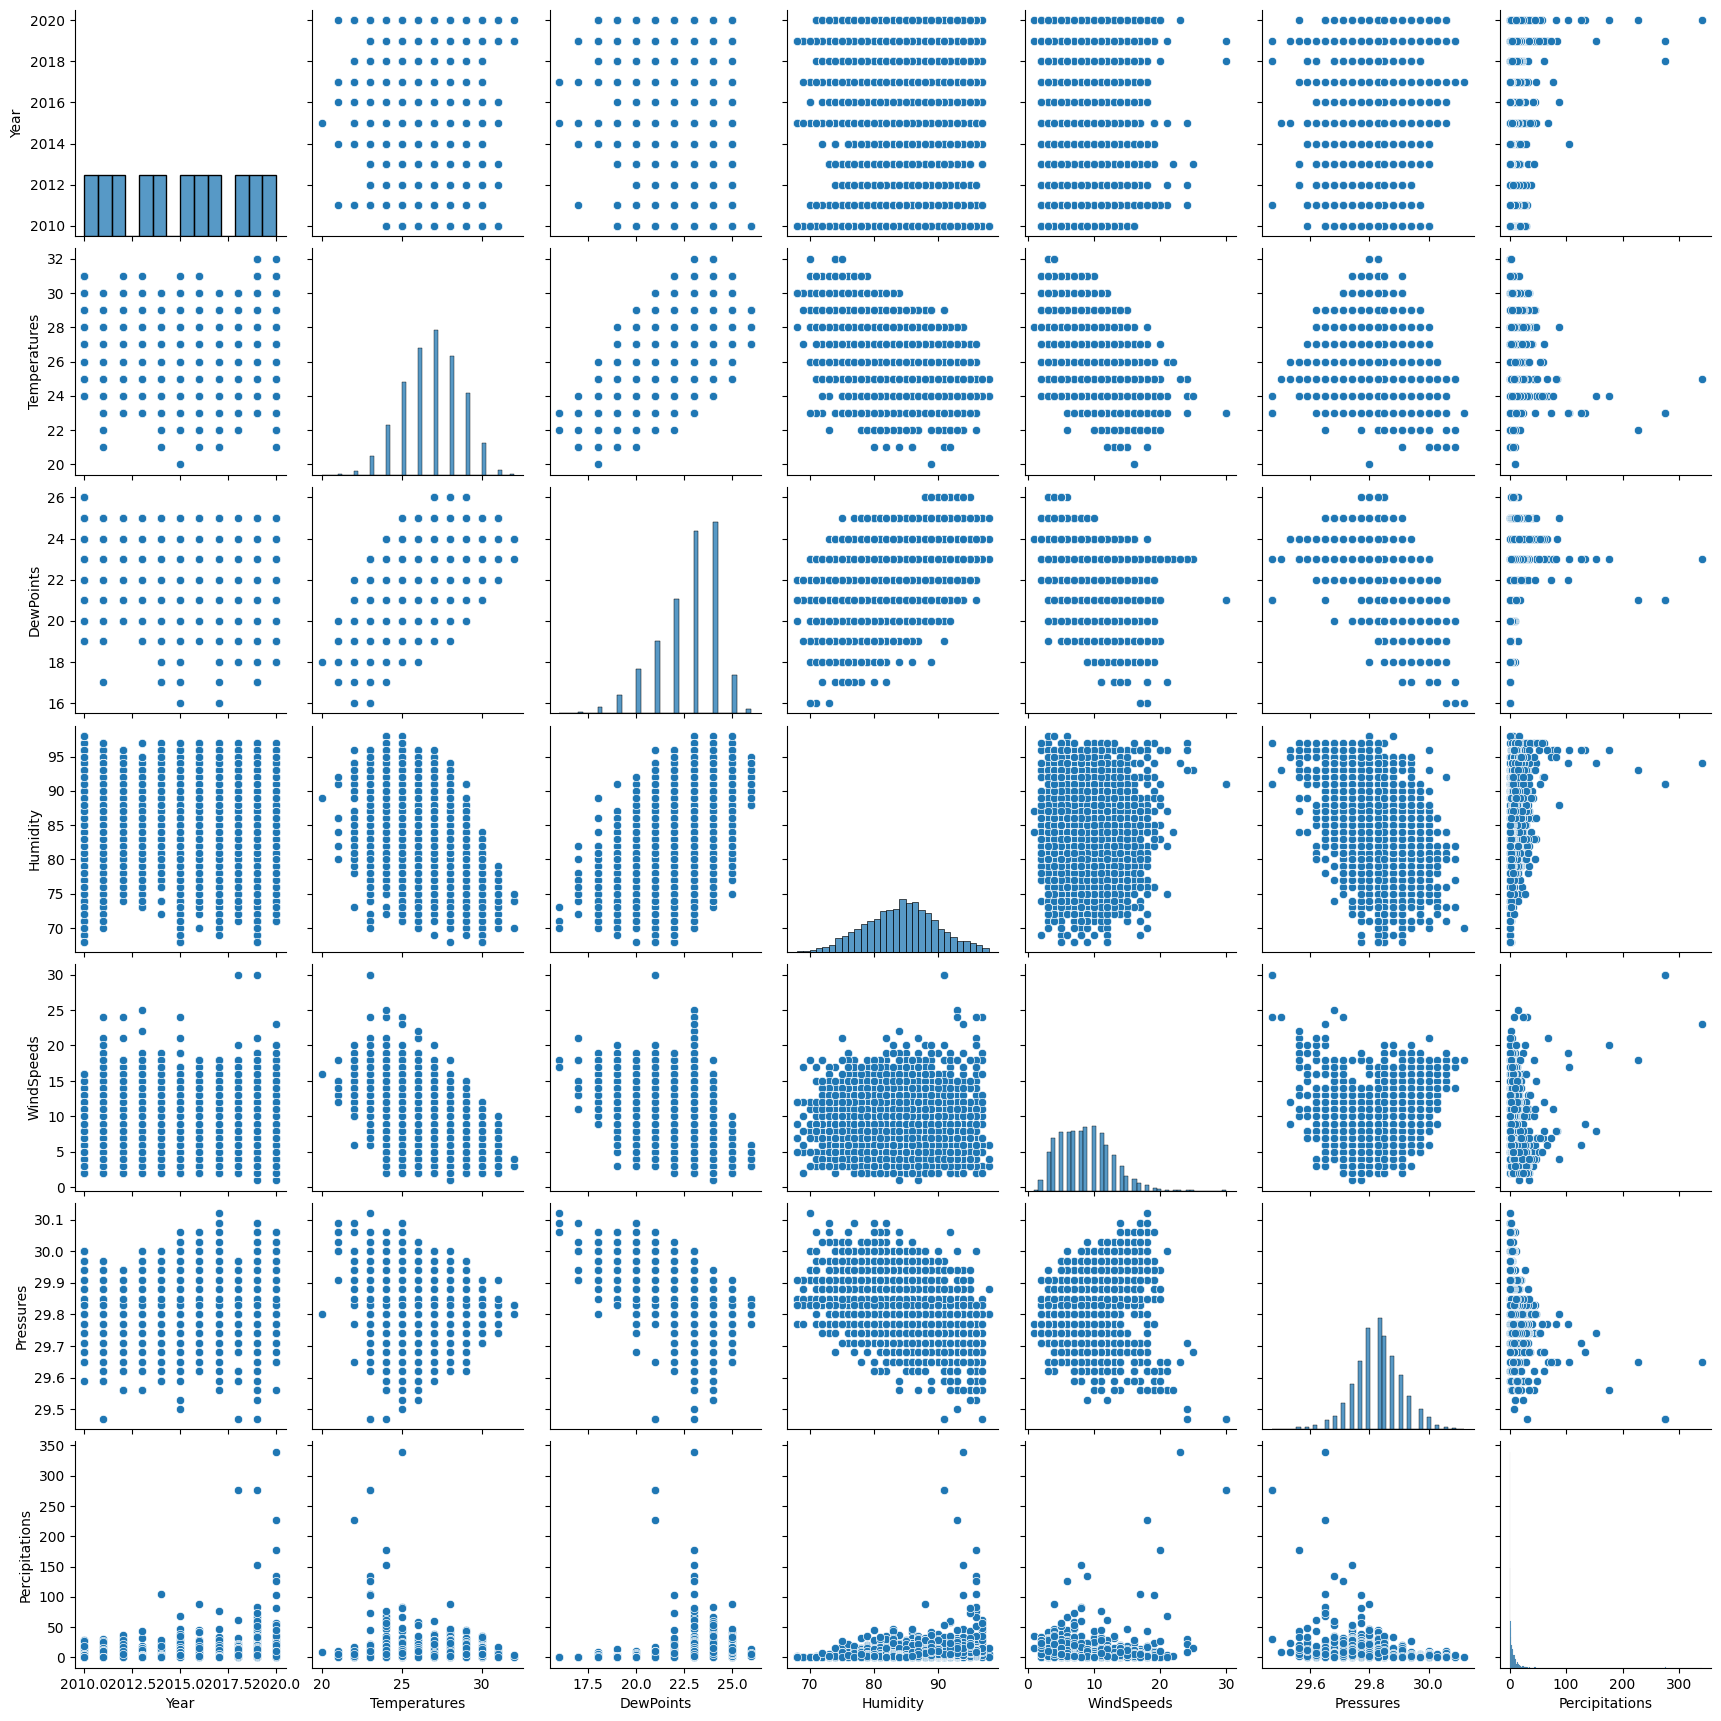

In [35]:
sns.pairplot(data)
plt.show()

<AxesSubplot: xlabel='WindSpeeds', ylabel='Density'>

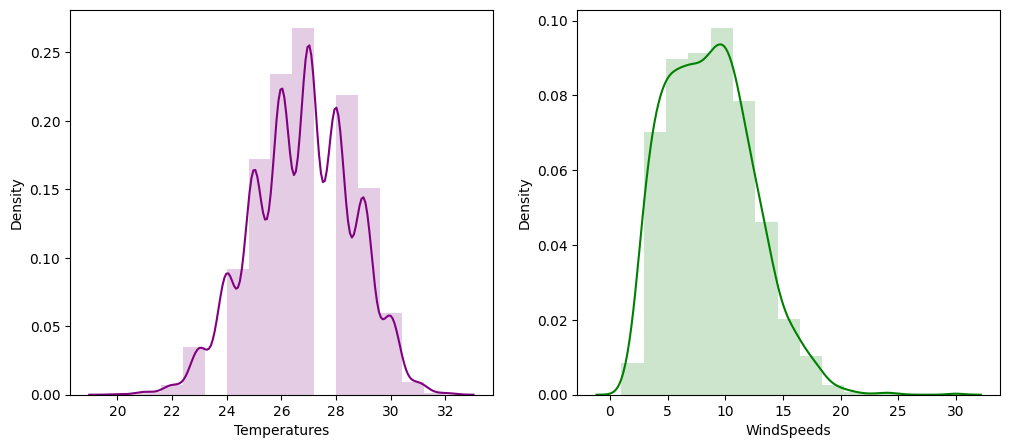

In [36]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.distplot(data['Temperatures'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(data['WindSpeeds'],color="green",bins=15,hist_kws={'alpha':0.2})

<AxesSubplot: xlabel='Humidity', ylabel='Density'>

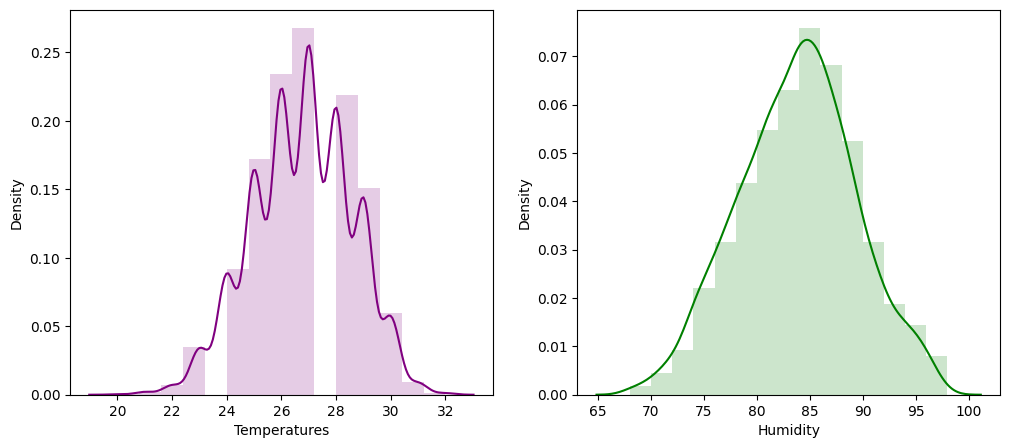

In [37]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.distplot(data['Temperatures'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(data['Humidity'],color="green",bins=15,hist_kws={'alpha':0.2})

<AxesSubplot: xlabel='count', ylabel='TypesOfCrops'>

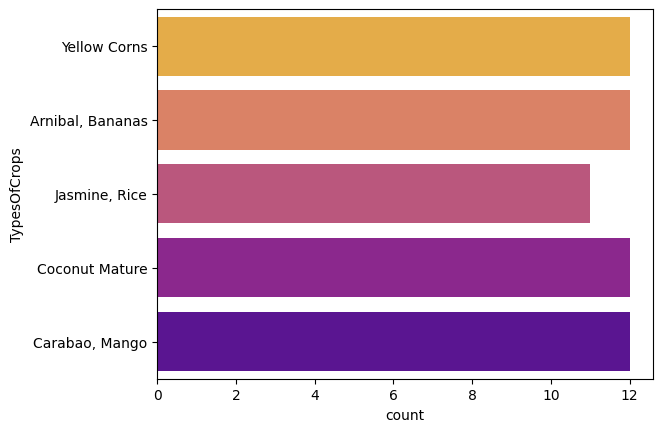

In [38]:
sns.countplot(y='TypesOfCrops',data=data, palette="plasma_r")

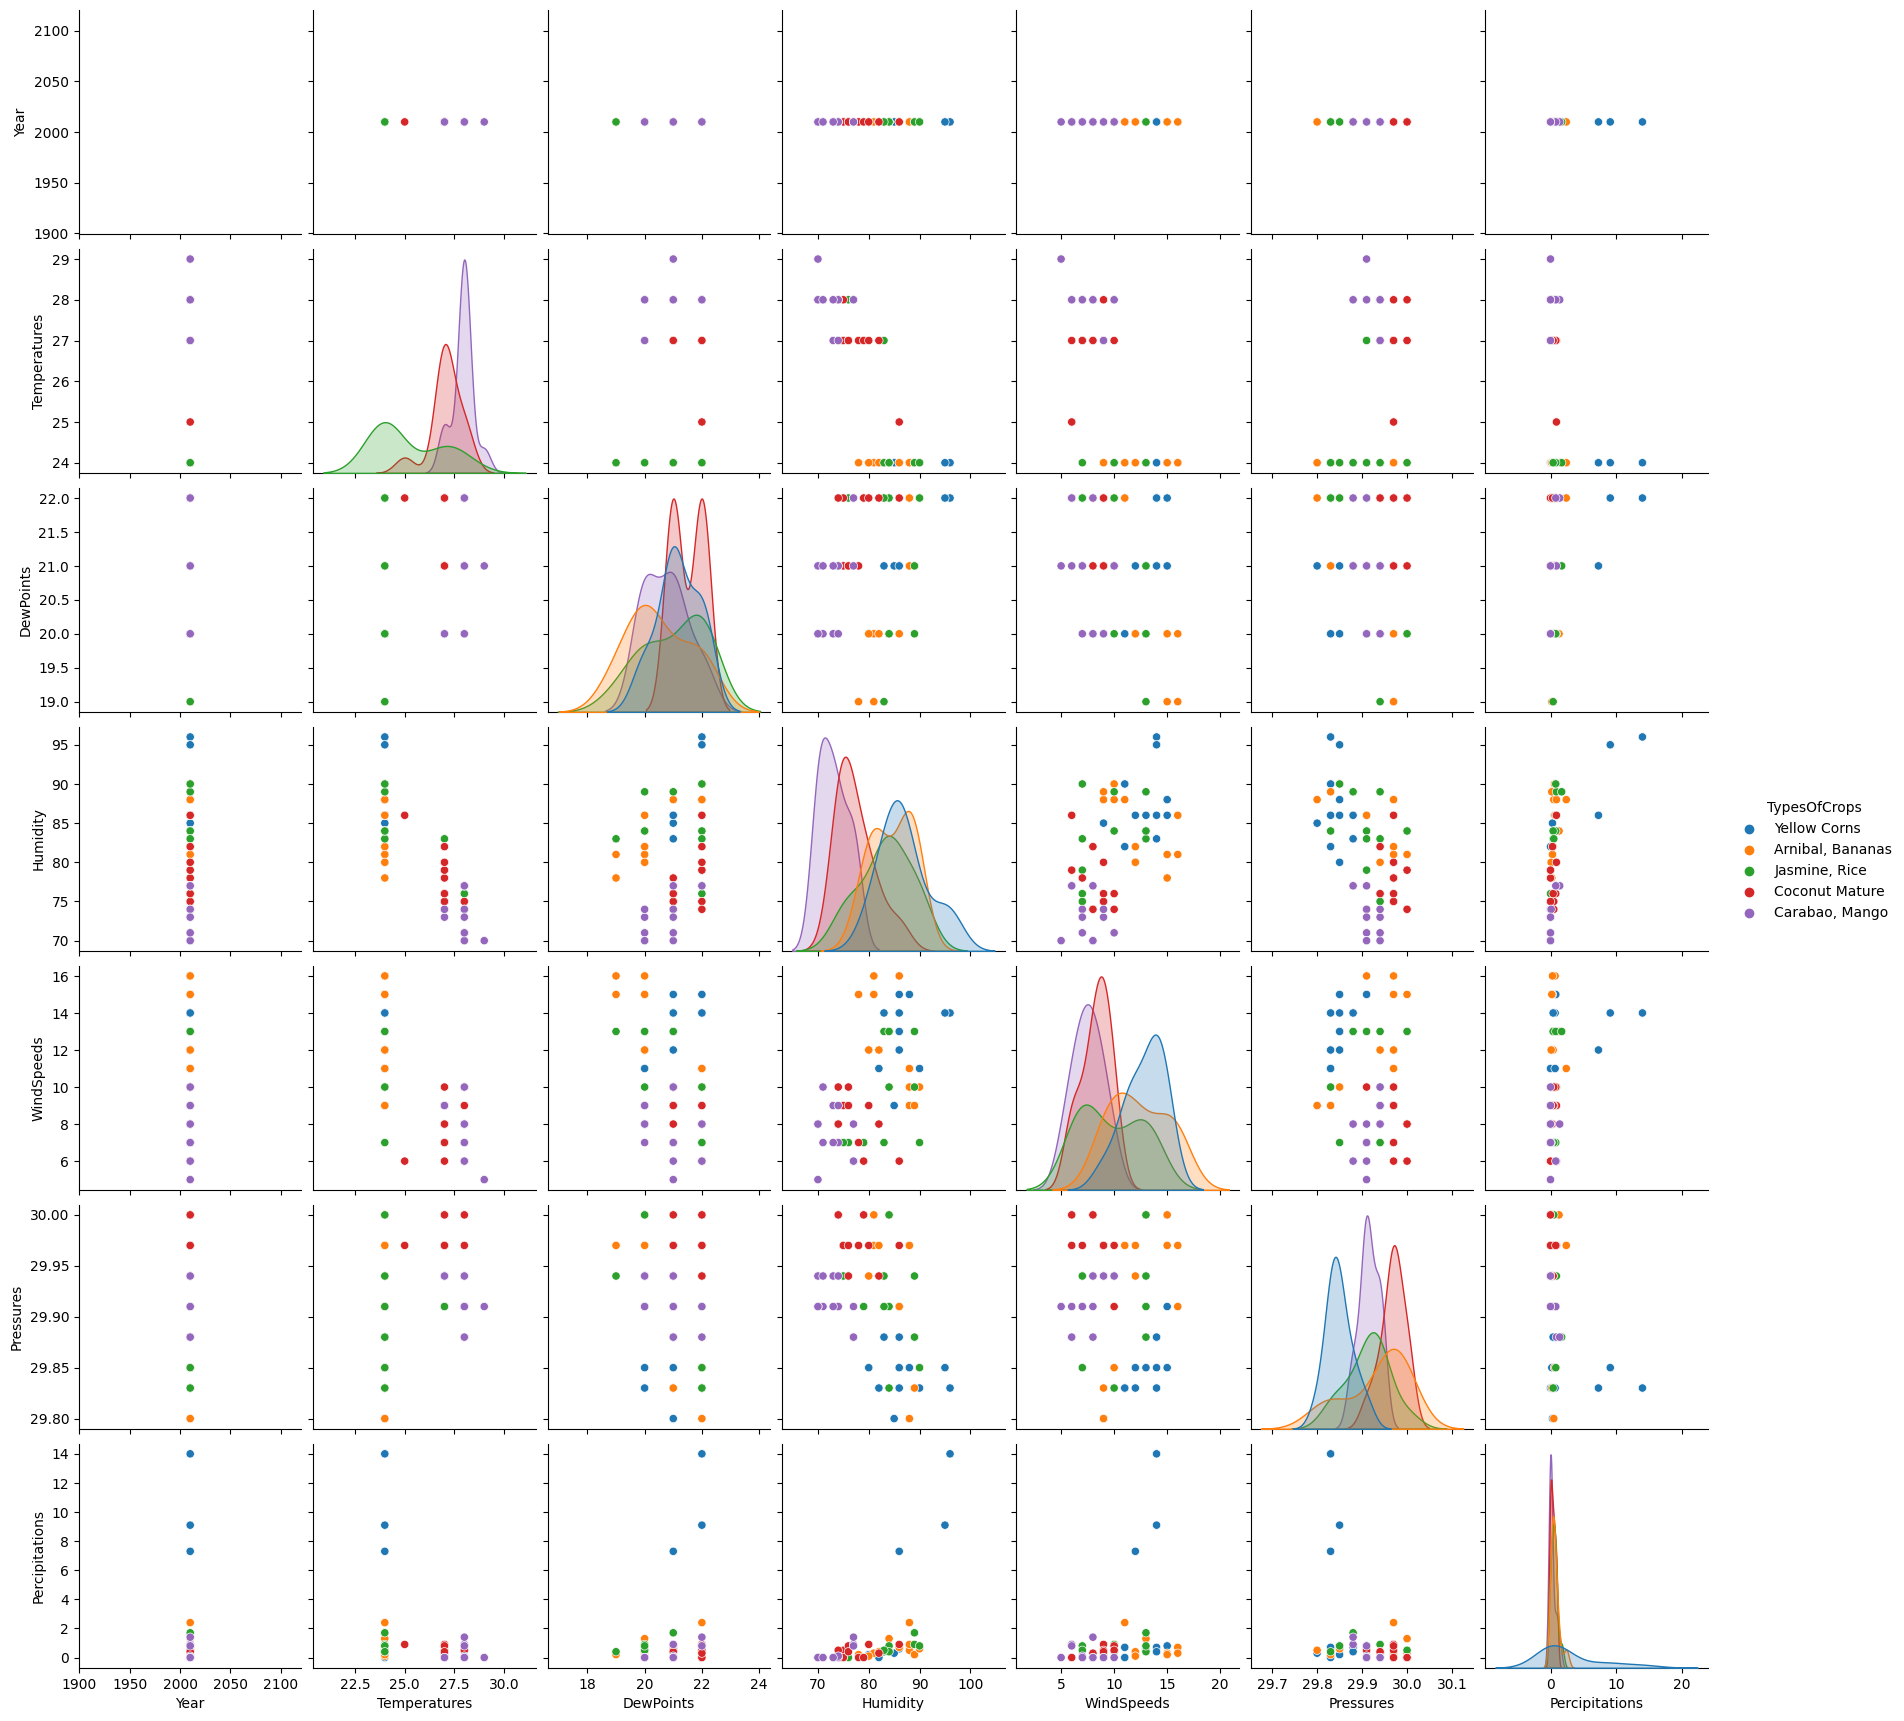

In [39]:
sns.pairplot(data, hue = 'TypesOfCrops')

In [40]:
data.head(1)

,Domain,Area,Element,Year,Temperatures,DewPoints,Humidity,WindSpeeds,Pressures,Percipitations,Date,TypesOfCrops,Unit,Value,Nutrients,Soil
0,Crops,"Sulib Pangil, Laguna",Yield,2010,24,21,86,15,29.91,0.8,1/1/2010,Yellow Corns,metric ton,"2,708.00","Calcium (Ca), magnesium (Mg), and sulfur (S). ...","pH of 6.0-6.8. light soil (sand or loam), heav..."


In [47]:
df = data.drop(['Domain', 'Area', 'Element', 'Date', 'TypesOfCrops',  'Unit', 'Nutrients', 'Soil', 'Value'], axis=1)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=100)
forest = RandomForestRegressor(n_estimators=30, random_state=30)
rf = forest.fit(X_train, Y_train)
print('Crop Prediction: ', rf.score(X_train,Y_train))



Crop Prediction:  0.9181691186761882


In [51]:
forest.predict(X_test)

array([2.12333333, 0.16666667, 7.46333333, ..., 5.12333333, 5.76333333,
       0.48166667])

In [52]:
X_test

,Year,Temperatures,DewPoints,Humidity,WindSpeeds,Pressures
3664,2020,25,21,84,11,29.85
2998,2018,27,21,78,9,29.85
3059,2018,29,23,79,8,29.74
555,2011,26,23,88,7,29.71
2837,2017,26,24,91,3,29.74
...,...,...,...,...,...,...
616,2011,27,24,90,4,29.80
812,2012,27,24,85,6,29.85
1637,2014,27,24,88,9,29.74
2399,2016,28,24,84,7,29.80


In [54]:
y_pred = forest.predict(X_test)
get_prod = y_pred[-1]
print(get_prod)

0.4816666666666665


In [ ]:
Domain = input('Domain: ')
Area = input('Area: ')
Elements = input('Elements: ')
Crops = input('Crops: ')
YearCode = input('Year Code: ')
Year = input('Year: ')
Unit = input('Unit: ')
Value = input('Value: ')

Prediction = forest.predict([[float(Domain),
       float(Area),
       float(Elements),
       float(Crops),
       float(YearCode),
       float(Year),
       float(Unit),
       float(Value)]])
print('Production: ', Prediction)